<a href="https://colab.research.google.com/github/filmerxyz/TensorSkin/blob/master/TensorSkin_ensemble_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from pj61403_utils_functions import *

# Git Clone

In [2]:
!git clone https://github.com/EvilPickle-PCSHSPT/PJ61403_DATA_split_50-25-25

!git clone https://github.com/filmerxyz/TensorSkin

fatal: destination path 'PJ61403_DATA_split_50-25-25' already exists and is not an empty directory.
fatal: destination path 'TensorSkin' already exists and is not an empty directory.


# WIDTH AND HEIGHT

In [4]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [5]:
test_path = '/content/PJ61403_DATA_split_50-25-25/crop_split_classes_data/test'

test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_data.flow_from_directory(directory=test_path,
                                               target_size=(IMG_WIDTH, IMG_HEIGHT),
                                               batch_size=1,
                                               shuffle=False,
                                               class_mode=None)

test_labels = test_generator.classes

Found 63 images belonging to 4 classes.


# Ensemble

In [6]:
def ArithmeticMean_ensemble(test_data, model_1, model_2, model_3):
  model_1 = tf.keras.models.load_model(model_1)
  model_2 = tf.keras.models.load_model(model_2)
  model_3 = tf.keras.models.load_model(model_3)
  ans_1 = model_1.predict(test_data)
  ans_2 = model_2.predict(test_data)
  ans_3 = model_3.predict(test_data)
  all_answer_list = []
  for i in range(len(ans_1)):
    answer_list = []
    for j in range(len(ans_1[i])):
      mean_ans = (ans_1[i][j] + ans_2[i][j] + ans_3[i][j])/3
      answer_list.append(mean_ans)
    all_answer_list.append(answer_list)
  return all_answer_list

# Evalate

In [7]:
ensemble_ans = ArithmeticMean_ensemble(test_generator, '/content/TensorSkin/model/TensorSkin_model_1.h5', '/content/TensorSkin/model/TensorSkin_model_2.h5', '/content/TensorSkin/model/TensorSkin_model_3.h5')

In [9]:
ensemble_ans_array = np.asarray(ensemble_ans)

## Confusion Matrix

In [11]:
classes_names = ['ad', 'nm', 'ps', 'sk']

In [12]:
cm = confusion_matrix(test_labels, ensemble_ans_array.argmax(axis=1))

### Without Normalize

Confusion matrix, without normalization
[[16  1  0  0]
 [ 0 15  0  0]
 [ 0  0 16  0]
 [ 1  0  0 14]]


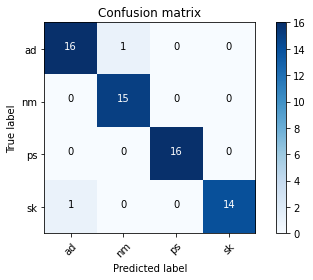

In [13]:
plot_confusion_matrix(cm, classes_names, False)

### With Normalize

Normalized confusion matrix
[[0.94117647 0.05882353 0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.06666667 0.         0.         0.93333333]]


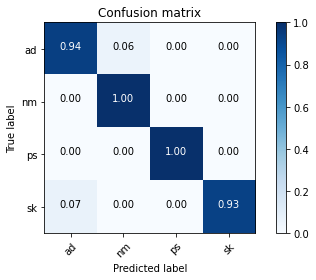

In [14]:
plot_confusion_matrix(cm, classes_names, True)

## Classification Report

In [15]:
y_pred = np.argmax(ensemble_ans_array, axis=1)
print('Classification Report')
print(classification_report(test_labels, y_pred, target_names=classes_names))

Classification Report
              precision    recall  f1-score   support

          ad       0.94      0.94      0.94        17
          nm       0.94      1.00      0.97        15
          ps       1.00      1.00      1.00        16
          sk       1.00      0.93      0.97        15

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63

